In [17]:
import xgboost as xgb
import seaborn as sns
import pandas as pd


In [18]:
dtrain = xgb.DMatrix('./data/agaricus.txt.train')
dtest = xgb.DMatrix('./data/agaricus.txt.test')

In [19]:
params={
    'objective':'binary:logistic',
    'max_depth':1,
    'silent':1,
    'eta':0.5
}
num_rounds=5

In [20]:
watchlist=[(dtest,'test'),(dtrain,'train')]
bst=xgb.train(params,dtrain,num_rounds,watchlist)

[0]	tesst-error:0.11049	train-error:0.113926
[1]	tesst-error:0.11049	train-error:0.113926
[2]	tesst-error:0.03352	train-error:0.030401
[3]	tesst-error:0.027312	train-error:0.021495
[4]	tesst-error:0.031037	train-error:0.025487


In [25]:
tree_dump=bst.get_dump(fmap='./data/featmap.txt', with_stats=True)
for tree in tree_dump:
    print(tree)

0:[odor=pungent] yes=2,no=1,gain=4000.53101,cover=1628.25
	1:leaf=0.647757947,cover=924.5
	2:leaf=-0.933309674,cover=703.75

0:[odor=musty] yes=2,no=1,gain=1377.22437,cover=1404.203
	1:leaf=-0.339609325,cover=1008.21417
	2:leaf=0.759690285,cover=395.988831

0:[gill-size=narrow] yes=2,no=1,gain=1210.76575,cover=1232.64319
	1:leaf=0.673357666,cover=430.293335
	2:leaf=-0.36520344,cover=802.349915

0:[stalk-surface-above-ring=smooth] yes=2,no=1,gain=791.95874,cover=1111.84363
	1:leaf=-0.277528912,cover=765.906372
	2:leaf=0.632880688,cover=345.937195

0:[odor=pungent] yes=2,no=1,gain=493.703613,cover=981.6828
	1:leaf=0.275961101,cover=638.372559
	2:leaf=-0.466680348,cover=343.310272



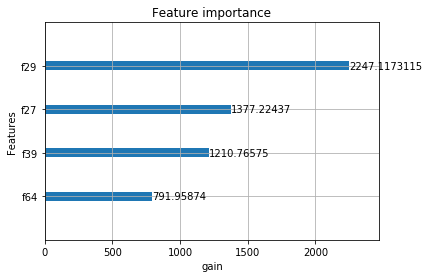

In [26]:
xgb.plot_importance(bst,importance_type='gain',xlabel='gain')

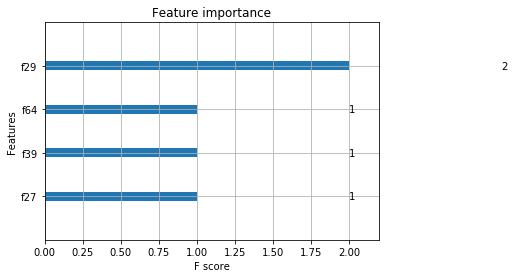

In [28]:
xgb.plot_importance(bst)

In [30]:
importances=bst.get_fscore()
importances

{'f29': 2, 'f27': 1, 'f39': 1, 'f64': 1}

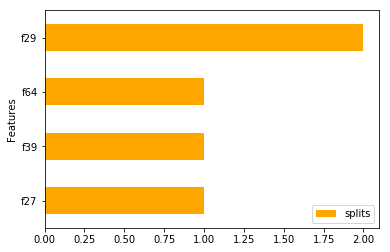

In [43]:
importance_df=pd.DataFrame({
    'splits':list(importances.values()),
    'Features':list(importances.keys())
})
importance_df.sort_values(by='splits',inplace=True)
importance_df.plot(kind='barh',x='Features',color='Orange')